In [1]:
from torch_geometric.datasets import Planetoid
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
#import matplotlib.pyplot as plt
import pylab as plt
import pickle
import sys
import numpy as np

from GNM_Toolbox.data.dataloader import *

In [21]:
all_models5 = pickle_read('l1_analysis-citeseer_small.pkl')

In [15]:
def setBoxColors(bp, edge_color='red', face_color='red'):
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)
    plt.setp(bp["boxes"], facecolor=face_color)
    plt.setp(bp["fliers"], markeredgecolor=face_color)
    
def plot_data(all_models, colors, names, dist = [-0.15, 0.15]):
    M = len(all_models)
    
    # Set up 
    fig = plt.figure(figsize=(18, 8))
    ax = plt.axes()
    minimum = 1
    maximum = 0
    for i, l in zip(range(1, M+1), all_models):
        for models, color, (dd, d) in zip(all_models[l], colors, enumerate(dist)):
            acc = list()
            for model in models:
                if type(model[1]) == type(list()):
                    acc.append(model[1][len(model[1])-1])
                else:
                    acc.append(model[1])
            if dd == 0:
                print('\\hline')
                print('{} & \\textbf{{NLL}} & \\textbf{{{:.3f}}} & \\textbf{{{}}} \\\\'.format(l, np.mean(acc), np.format_float_scientific(np.var(acc), precision=2)))
            elif dd == 1:
                print('& $\\textbf{{L}}_1$ & \\textbf{{{:.3f}}} & \\textbf{{{}}} \\\\'.format(np.mean(acc), np.format_float_scientific(np.var(acc), precision=2)))
            else:
                sigma = [0, 0.0025, 0.005, 0.0075, 0.01, 0.0125, 0.015, 0.0175, 0.02]
                print('& $L_1$ + $\\sigma$ = {} & {:.3f} & {} \\\\'.format(sigma[dd-1], np.mean(acc), np.format_float_scientific(np.var(acc), precision=2)))
            
            # Find min und max
            if minimum > min(acc):
                minimum = min(acc)
            if maximum < max(acc):
                maximum = max(acc)
            bp = plt.boxplot([acc], positions = [i+d], widths = 0.5 / len(dist), patch_artist=True)
            setBoxColors(bp, 'black', color)
        
    # Set x-axis labels
    seperation_lines = [i + 0.5 for i in range(1, M)]
    plt.vlines(seperation_lines, 0, 1, colors='grey', linestyles='dashed')
    ax.set_xticks(list(range(1, M+1)))
    ax.set_yticks([0.3, 0.4, 0.5, 0.6, 0.65, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9])
    lambdas = list(all_models.keys())
    lambdas.sort()
    ax.set_xticklabels([int(l * 100)/100 for l in lambdas])
    #plt.ylim(minimum - 0.01, maximum + 0.01)
    plt.ylim(0.65, maximum + 0.01)
    plt.xlim(0.4, M + 0.6)
    
    # draw temporary red and blue lines and use them to create a legend
    helps = list()
    for color in colors:
        h, = plt.plot([1, 1], color=color)
        helps.append(h)
    ax.legend(helps, names, prop={'size': 16}) #plot.legend(loc=2, prop={'size': 6})
    ax.grid(True, axis='y')
    ax.set_xlabel(r'$\lambda$')
    ax.set_ylabel(r'Genauigkeit auf unbekannten Daten')
    for h in helps:
        h.set_visible(False)

\hline
1 & \textbf{NLL} & \textbf{0.860} & \textbf{4.81e-04} \\
& $\textbf{L}_1$ & \textbf{0.872} & \textbf{3.8e-04} \\
& $L_1$ + $\sigma$ = 0.0025 & 0.873 & 4.6e-04 \\
& $L_1$ + $\sigma$ = 0.005 & 0.870 & 5.45e-04 \\
& $L_1$ + $\sigma$ = 0.0075 & 0.870 & 5.56e-04 \\
& $L_1$ + $\sigma$ = 0.01 & 0.870 & 4.83e-04 \\
& $L_1$ + $\sigma$ = 0.0125 & 0.863 & 2.51e-03 \\
& $L_1$ + $\sigma$ = 0.015 & 0.864 & 6.47e-04 \\
& $L_1$ + $\sigma$ = 0.0175 & 0.854 & 9.82e-04 \\
& $L_1$ + $\sigma$ = 0.02 & 0.842 & 1.31e-03 \\
\hline
1.5 & \textbf{NLL} & \textbf{0.889} & \textbf{1.52e-04} \\
& $\textbf{L}_1$ & \textbf{0.890} & \textbf{1.69e-04} \\
& $L_1$ + $\sigma$ = 0.0025 & 0.889 & 1.72e-04 \\
& $L_1$ + $\sigma$ = 0.005 & 0.889 & 1.81e-04 \\
& $L_1$ + $\sigma$ = 0.0075 & 0.888 & 1.59e-04 \\
& $L_1$ + $\sigma$ = 0.01 & 0.888 & 1.89e-04 \\
& $L_1$ + $\sigma$ = 0.0125 & 0.885 & 2.42e-04 \\
& $L_1$ + $\sigma$ = 0.015 & 0.880 & 2.83e-04 \\
& $L_1$ + $\sigma$ = 0.0175 & 0.873 & 5.10e-04 \\
& $L_1$ + $\sigma$

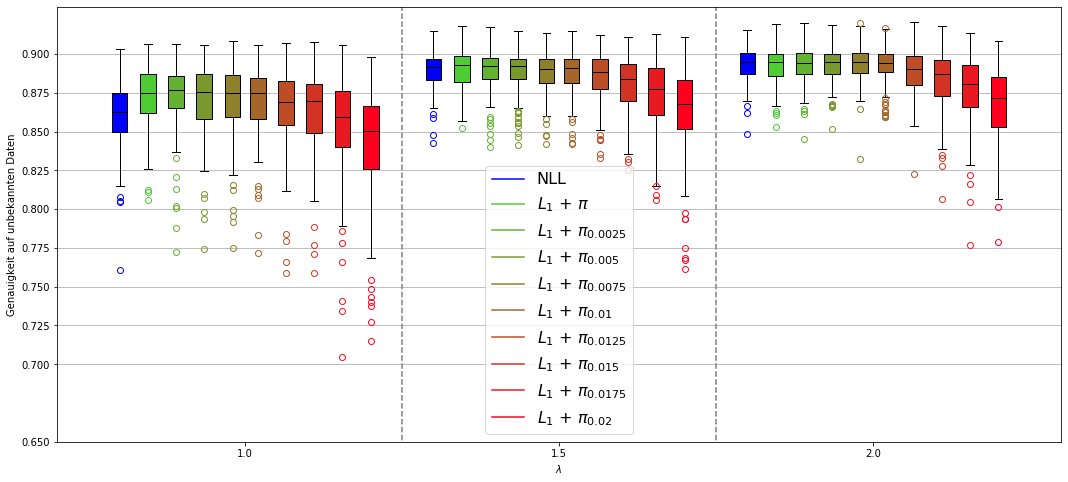

In [22]:
# 0, 0.0025, 0.005, 0.0075, 0.01, 0.0125, 0.015, 0.0175, 0.02
plot_data(all_models5, 
          ('b', *[(0.3 + i * 0.0875, 0.8 - i * 0.1, 0.2 - i * 0.01) for i in range(9)]), 
          ['NLL', r'$L_1$ + $\pi$', r'$L_1$ + $\pi_{0.0025}$', r'$L_1$ + $\pi_{0.005}$', r'$L_1$ + $\pi_{0.0075}$', r'$L_1$ + $\pi_{0.01}$', r'$L_1$ + $\pi_{0.0125}$', r'$L_1$ + $\pi_{0.015}$', r'$L_1$ + $\pi_{0.0175}$', r'$L_1$ + $\pi_{0.02}$'], 
          dist = [-0.4, -0.31, -0.22, -0.13, -0.04, 0.04, 0.13, 0.22, 0.31, 0.4])


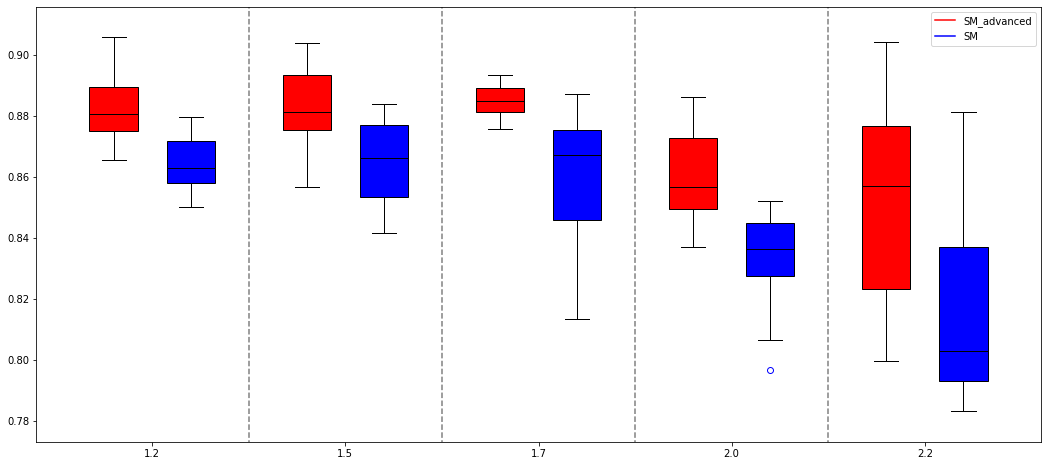

In [5]:
plot_data(all_models3, ('red', 'blue'), ['SM_advanced', 'SM'], dist = [-0.2, 0.2])

In [ ]:
def plot_iterations(all_models, colors, names, dist = [-0.15, 0.15]):
    M = len(all_models)
    
    # Set up 
    fig = plt.figure(figsize=(18, 8))
    ax = plt.axes()
    minimum = 1
    maximum = 0
    for i, l in zip(range(1, M+1), all_models):
        models = all_models[l][2]
        color = colors[1]
        d = 0
        acc = list()
        for model in models:
            acc.append(model[2])

        # Find min und max
        if minimum > min(acc):
            minimum = min(acc)
        if maximum < max(acc):
            maximum = max(acc)

        bp = plt.boxplot([acc], positions = [i+d], widths = 0.25, patch_artist=True)
        setBoxColors(bp, 'black', color)
        
    # Set x-axis labels
    seperation_lines = [i + 0.5 for i in range(1, M)]
    plt.vlines(seperation_lines, 0, 1, colors='grey', linestyles='dashed')
    ax.set_xticks(list(range(1, M+1)))
    lambdas = list(all_models.keys())
    lambdas.sort()
    ax.set_xticklabels([int(l * 100)/100 for l in lambdas])
    plt.ylim(minimum - 0.01, maximum + 2)
    plt.xlim(0.6, M + .4)
    
    # draw temporary red and blue lines and use them to create a legend
    helps = list()
    for color in colors:
        h, = plt.plot([1, 1], color=color)
        helps.append(h)
    ax.legend(helps, names)
    for h in helps:
        h.set_visible(False)

In [ ]:
plot_iterations(all_models, ('red', 'blue'), ('SM5', 'SM'))